# Geothermal doublets

In this notebook, we will take a look at geothermal doublets. It will cover the definition of a geothermal doublet installation, explain some _buzzwords_ such as "thermal breakthrough" or "kalina cycle", and show some results of a numerical doublet simulation.  
This simulation is run with SHEMAT-Suite, a numerical code for simulating heat- and mass transfer in a porous medium. The simulations are run on a synthetic model of a graben system over a time of 35 years. That means, we simulate geothermal power production over a lifespan of 35 years.

In [2]:
# necessary libraries
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# for improving plot aesthetics
import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster')

In [3]:
# 3D model file
mod = h5py.File('../data/Input_f_final.h5')
x = mod['x'][0,0,:]
y = mod['y'][0,:,0]
z = mod['z'][:,0,0]
t = mod['temp'][:,:,:]
ui = mod['uindex'][:,:,:]

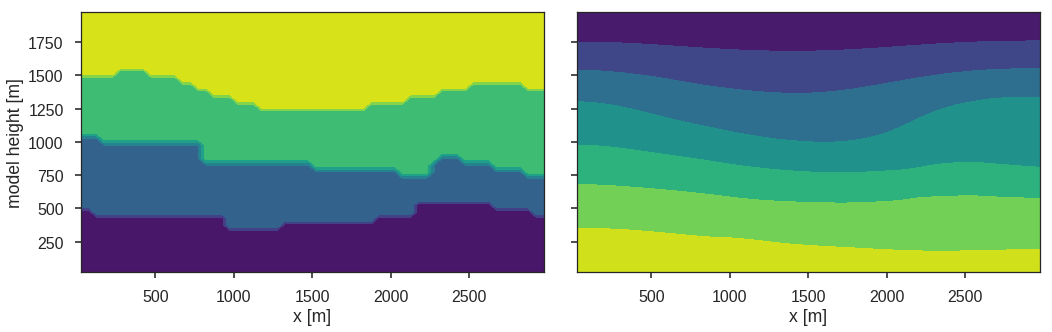

In [33]:
cs = 25
fig, axs = plt.subplots(1, 2, figsize=[15,5], sharey=True, sharex=True)
axs[0].contourf(y, z, ui[:,:,cs], cmap= 'viridis')
axs[1].contourf(y, z, t[:,:,cs], cmap='viridis')
axs[0].set_ylabel('model height [m]')
axs[0].set_xlabel('x [m]')
axs[1].set_xlabel('x [m]')
plt.tight_layout()